In [1]:
import cv2
import mediapipe as mp
from IPython.display import display, Image, clear_output

In [2]:
def show_live_video():
    mp_face_detection = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils

    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to access the webcam.")
        return

    with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.2) as face_detection:
        try:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    print("Error: Failed to capture image.")
                    break

                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                results = face_detection.process(frame_rgb)

                if results.detections:
                    for detection in results.detections:
                        mp_drawing.draw_detection(frame, detection)

                clear_output(wait=True)
                display(Image(data=cv2.imencode('.jpg', frame)[1].tobytes()))

        except KeyboardInterrupt:
            cap.release()
            cv2.destroyAllWindows()

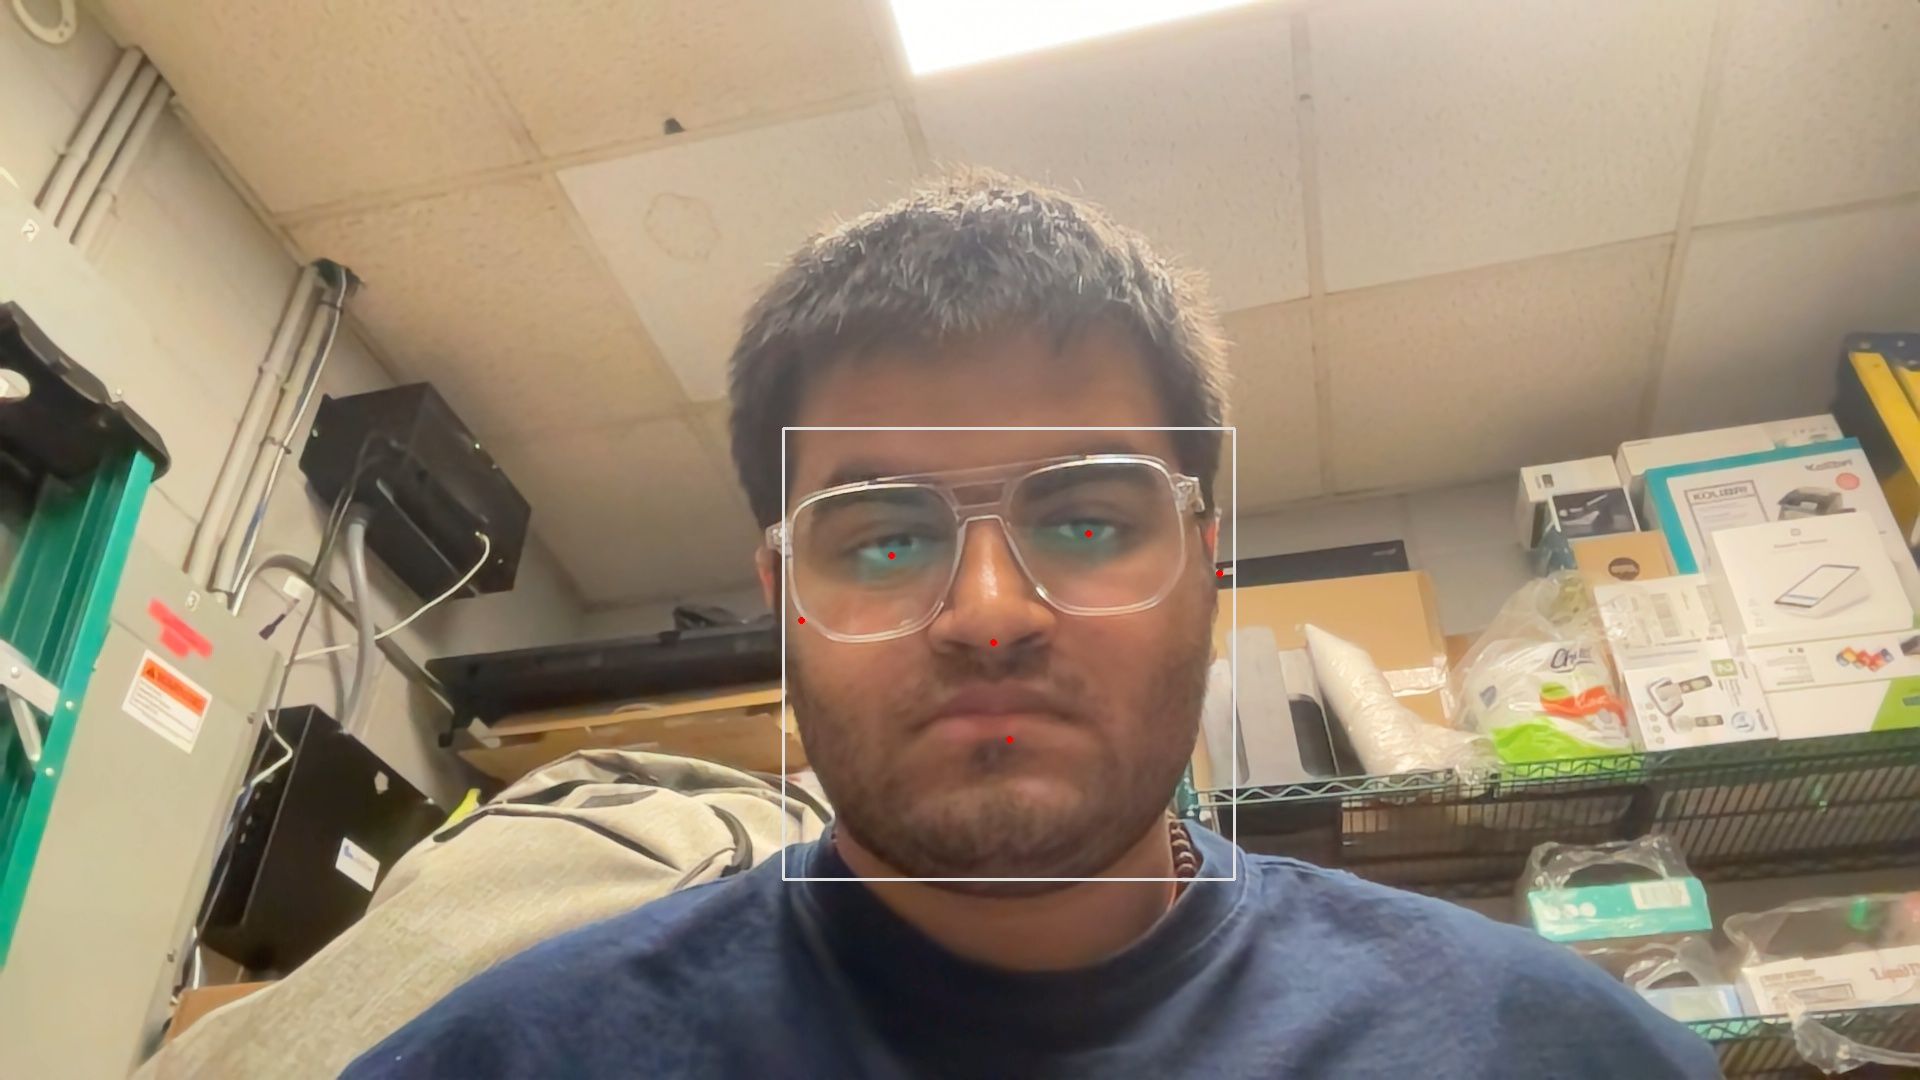

In [16]:
show_live_video()